In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Dataset_salary.csv')
display(df)

,ano_de_trabalho,nivel_de_experiencia,tipo_de_emprego,cargo,salario,moeda_salario,salario_em_usd,residencia_do_funcionario,proporcao_remota,localizacao_da_empresa,tamanho_da_empresa
0,2024,Senior,Tempo Integral,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,Senior,Tempo Integral,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,Senior,Tempo Integral,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,Senior,Tempo Integral,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,Senior,Tempo Integral,Machine Learning Engineer,190000,USD,190000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
16529,2020,Senior,Tempo Integral,Data Scientist,412000,USD,412000,US,100,US,G
16530,2021,Intermediario,Tempo Integral,Principal Data Scientist,151000,USD,151000,US,100,US,G
16531,2020,Iniciante,Tempo Integral,Data Scientist,105000,USD,105000,US,100,US,P
16532,2020,Iniciante,Contrato,Business Data Analyst,100000,USD,100000,US,100,US,G


# Análise de tendências salariais ao longo do tempo

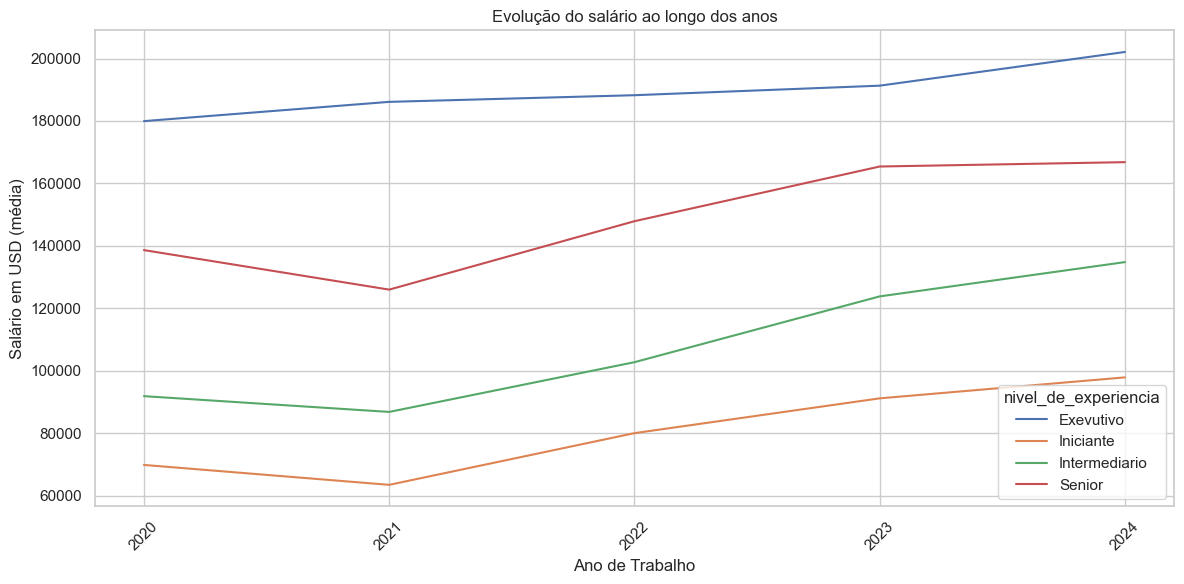

Média de salário em USD por nível de experiência (em ordem decrescente):
nivel_de_experiencia
Exevutivo        U$ 189,553.31
Senior           U$ 148,955.77
Intermediario    U$ 108,012.04
Iniciante         U$ 80,474.31
Name: salario_em_usd, dtype: object


In [20]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_group, x='ano_de_trabalho', y='salario_em_usd', hue='nivel_de_experiencia')
plt.xlabel('Ano de Trabalho', fontsize=12)
plt.ylabel('Salário em USD (média)', fontsize=12)
plt.title('Evolução do salário ao longo dos anos')
plt.xticks(ticks=range(2020, 2025), rotation=45) 
plt.tight_layout()
plt.show()

# Cálculo da média de salário por nível de experiência 
media_salario_experiencia = (
    df_group.groupby('nivel_de_experiencia')['salario_em_usd']
    .mean()
    .sort_values(ascending=False)
)

# Formatando a média de salário 
media_salario_experiencia = media_salario_experiencia.apply(lambda x: f"U$ {x:,.2f}")

# Exibindo a média de salário por nível de experiência
print("Média de salário em USD por nível de experiência (em ordem decrescente):")
print(media_salario_experiencia)


# Comparação de salários remotos e presenciais

/var/folders/8m/ggz5tqn57pj2_kyhqmpfm56h0000gn/T/ipykernel_9911/1085564081.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tipo de Proporção Remota', y='Salário Médio (USD)', data=dados_grafico, palette='Blues_d')


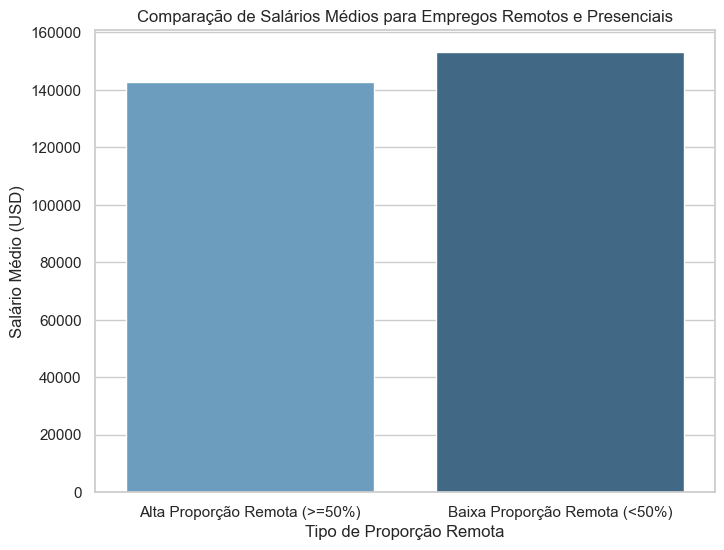

In [12]:
alta_remota = df[df['proporcao_remota'] >= 50]
baixa_remota = df[df['proporcao_remota'] < 50]

# Calcular o salário médio para cada grupo
media_alta_remota = alta_remota['salario_em_usd'].mean()
media_baixa_remota = baixa_remota['salario_em_usd'].mean()

# Criar um DataFrame para o gráfico de barras
dados_grafico = pd.DataFrame({
    'Tipo de Proporção Remota': ['Alta Proporção Remota (>=50%)', 'Baixa Proporção Remota (<50%)'],
    'Salário Médio (USD)': [media_alta_remota, media_baixa_remota]
})

# Plotar o gráfico de barras usando seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Gráfico de barras
sns.barplot(x='Tipo de Proporção Remota', y='Salário Médio (USD)', data=dados_grafico, palette='Blues_d')

# Adicionar título e rótulos
plt.title('Comparação de Salários Médios para Empregos Remotos e Presenciais')
plt.xlabel('Tipo de Proporção Remota')
plt.ylabel('Salário Médio (USD)')

# Mostrar o gráfico
plt.show()


# Detecção de outliers salariais

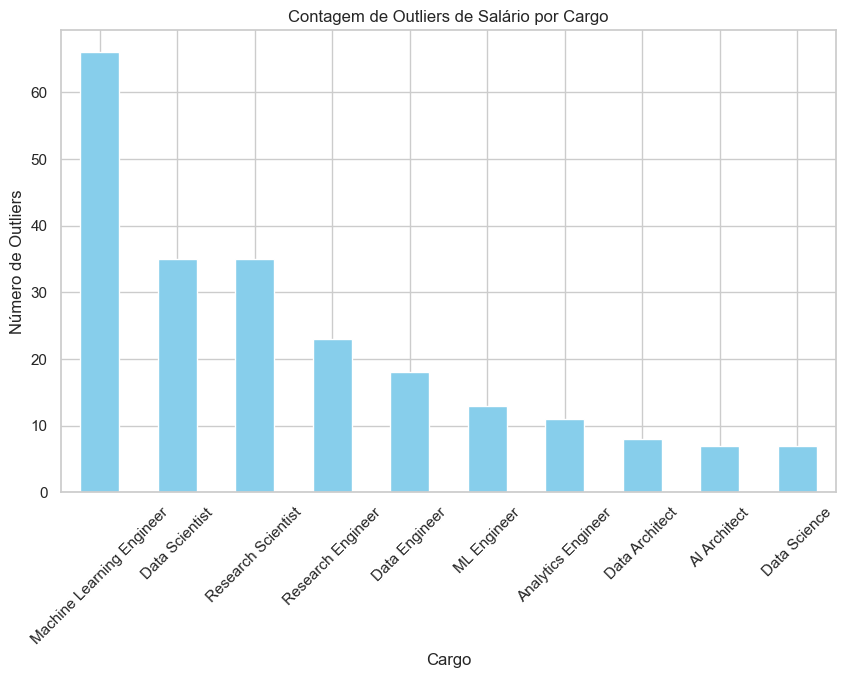

In [13]:
Q1 = df['salario_em_usd'].quantile(0.25)
Q3 = df['salario_em_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['salario_em_usd'] < lower_bound) | (df['salario_em_usd'] > upper_bound)]

outliers_count = outliers['cargo'].value_counts().head(10)

plt.figure(figsize=(10, 6))
outliers_count.plot(kind='bar', color='skyblue')
plt.title('Contagem de Outliers de Salário por Cargo')
plt.xlabel('Cargo')
plt.ylabel('Número de Outliers')
plt.xticks(rotation=45)
plt.show()